In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
32*68

2176

In [7]:
 for image_batch, label_batch in dataset.take(1):
        print(image_batch.numpy())

[[[[190. 188. 193.]
   [186. 184. 189.]
   [189. 187. 192.]
   ...
   [193. 187. 197.]
   [190. 182. 193.]
   [181. 173. 184.]]

  [[186. 184. 189.]
   [185. 183. 188.]
   [192. 190. 195.]
   ...
   [189. 183. 193.]
   [191. 183. 194.]
   [187. 179. 190.]]

  [[184. 182. 187.]
   [186. 184. 189.]
   [195. 193. 198.]
   ...
   [183. 177. 189.]
   [190. 182. 193.]
   [191. 183. 194.]]

  ...

  [[158. 153. 160.]
   [172. 167. 174.]
   [178. 173. 180.]
   ...
   [135. 134. 140.]
   [143. 142. 148.]
   [147. 146. 152.]]

  [[162. 156. 166.]
   [162. 156. 166.]
   [162. 157. 164.]
   ...
   [138. 137. 143.]
   [150. 149. 155.]
   [156. 155. 161.]]

  [[133. 127. 137.]
   [129. 123. 133.]
   [144. 139. 146.]
   ...
   [149. 148. 154.]
   [161. 160. 166.]
   [145. 144. 150.]]]


 [[[201. 196. 202.]
   [199. 194. 200.]
   [198. 193. 199.]
   ...
   [167. 165. 176.]
   [171. 169. 180.]
   [179. 177. 188.]]

  [[204. 199. 205.]
   [202. 197. 203.]
   [199. 194. 200.]
   ...
   [168. 166. 177.]
 

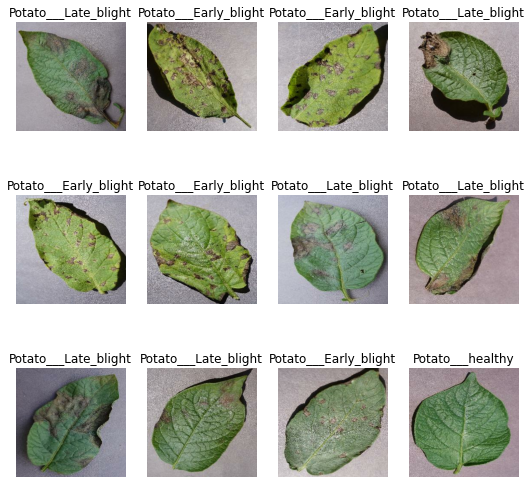

In [8]:
plt.figure(figsize=(9,9))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
#80% training
#10% val,10% test
train_size = 0.8
val_size = 0.1

In [10]:
train_size*len(dataset)

54.400000000000006

In [11]:
train_ds = dataset.take(54)
len(train_ds)

54

In [12]:
rem_ds = dataset.skip(54)
len(rem_ds)

14

In [13]:
val_size*len(dataset)

6.800000000000001

In [14]:
val_ds = rem_ds.take(6)
len(val_ds)

6

In [15]:
test_ds = rem_ds.skip(6)
len(test_ds)

8

In [16]:
 def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
        assert (train_split + test_split + val_split) == 1
        ds_size = len(ds)
        
        if shuffle:
            ds = ds.shuffle(shuffle_size,seed=12)
        
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)
        
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds,val_ds,test_ds
        

In [17]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [24]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    
    layers.Conv2D(64,(3,3),activation="relu",padding = 'same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    
    layers.Conv2D(64,(3,3),activation="relu",padding = 'same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu",padding = 'same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu",padding = 'same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation="relu",padding = 'same'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
    
])

model.build(input_shape=inout_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (32, 127, 127, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (32, 127, 127, 64)        18496     
                                                      

In [26]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
EPOCHS = 50
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 117s 2s/step - loss: 0.8594 - accuracy: 0.5700 - val_loss: 0.9358 - val_accuracy: 0.6458
Epoch 2/50
54/54 [==============================] - 98s 2s/step - loss: 0.5091 - accuracy: 0.7905 - val_loss: 0.6699 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 117s 2s/step - loss: 0.2919 - accuracy: 0.8819 - val_loss: 0.4588 - val_accuracy: 0.8073
Epoch 4/50
54/54 [==============================] - 125s 2s/step - loss: 0.2542 - accuracy: 0.8941 - val_loss: 0.2463 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 129s 2s/step - loss: 0.1875 - accuracy: 0.9277 - val_loss: 0.4180 - val_accuracy: 0.8333
Epoch 6/50
54/54 [==============================] - 136s 3s/step - loss: 0.1488 - accuracy: 0.9398 - val_loss: 0.2811 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 148s 3s/step - loss: 0.1735 - accuracy: 0.9392 - val_loss: 0.1836 - val_accuracy: 0.9219
Epoch 8/50
54/

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 434ms/step - loss: 0.0475 - accuracy: 0.9883


In [29]:
scores

[0.04753241315484047, 0.98828125]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

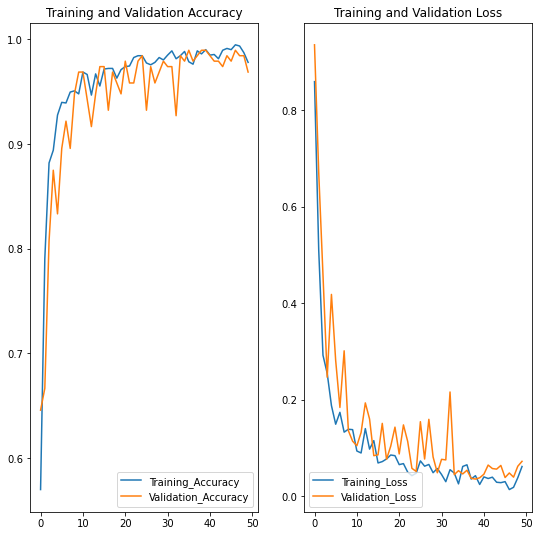

In [40]:
plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training_Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation_Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training_Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation_Loss")
plt.legend(loc='lower left')
plt.title("Training and Validation Loss")
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 314ms/step
predicted label: Potato___Late_blight


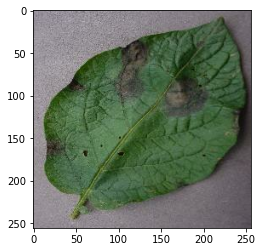

In [80]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    

In [81]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100*(np.max(predictions)),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 22ms/step


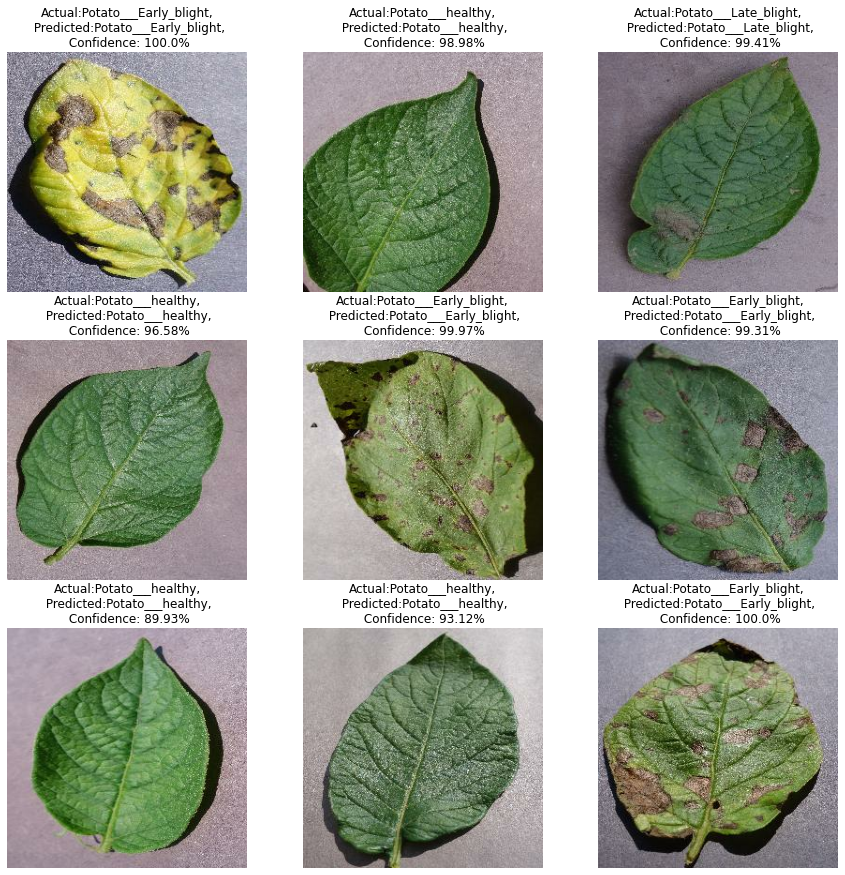

In [94]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [95]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [96]:
model.save("../potatoes.h5")